In [10]:
import numpy as np
from keras.datasets import cifar10

from skimage.feature import hog
from skimage import exposure  

import cv2
import matplotlib.pyplot as plt

# Dataset loading and shaping

In [11]:
np.random.seed(10)
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

print('train:', len(x_train))
print('test :', len(x_test))
print('train_image :', x_train.shape)
print('train_label :', y_train.shape)
print('test_image :', x_test.shape)
print('test_label :', y_test.shape)

train: 50000
test : 10000
train_image : (50000, 32, 32, 3)
train_label : (50000, 1)
test_image : (10000, 32, 32, 3)
test_label : (10000, 1)


In [12]:
x_train = x_train.astype('float64')
x_train /= 255

x_test = x_test.astype('float64')
x_test /= 255

# HOG

In [13]:
x_train_hog = []

for i in range(len(x_train)):
    fd , hog_im = hog(x_train[i] , orientations=9 , pixels_per_cell = (8, 8),
                     cells_per_block = (2, 2) , visualize = True ,  channel_axis=-1)
    x_train_hog.append(fd)

x_train_hog = np.array(x_train_hog)     

In [14]:
def show_random_images():
    
    import random
    
    rnd = random.randint(0, 5000)
    img = x_train[rnd]
    label = y_train[rnd][0]
    classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    
    fd, hog_img = hog(img, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(img, cmap=plt.cm.gray)  
    ax1.set_title(classes[label])

    ax2.axis('off')
    ax2.imshow(hog_img, cmap=plt.cm.gray)    
    ax2.set_title('HOG image')

    return

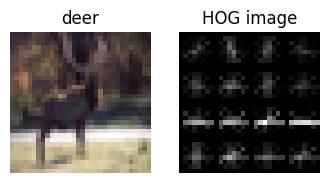

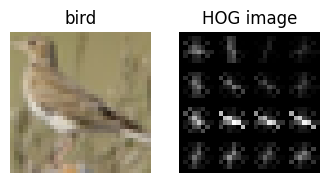

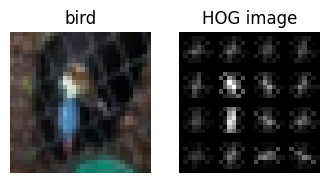

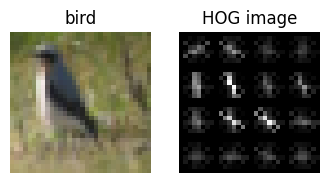

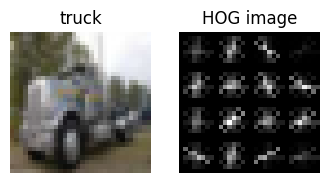

In [15]:
for i in range(5):
    show_random_images()   

# SVC model training

In [16]:
from sklearn import svm

model = svm.SVC(kernel = 'rbf')
model.fit(x_train_hog , y_train.ravel())

SVC()

# Accuracy score

In [17]:
from sklearn.metrics import accuracy_score

x_test_hog = []
for i in range(len(x_test)):
    fd , hog_im = hog(x_test[i] , orientations=9 , pixels_per_cell = (8, 8),
                     cells_per_block = (2, 2) , visualize = True ,  channel_axis=-1)
    x_test_hog.append(fd)

x_test_hog = np.array(x_test_hog)  
prdct = model.predict(x_test_hog)
print(accuracy_score(y_test , prdct))

0.6442
